# A/B Testing

#### TL;DR

1. To reinforce existing and solidify depth of knowledge concerning statistical testing and the methodology to approaching statistical analysis. Also to develop a deeper intuition for the **Naive Bayes Classifier** algorithm. 
2. learn the process of A/B Testing

#### Key Takeaways

$$P(A|B)=\frac{P(B|A)P(A)}{P(B)}$$

where the $P(B)=\sum_{A}P(A,B)=\sum_{A}P(B|A)P(A)$ which acts like a normalization term

#### Bayes for Classifiction

"Generative distribution- "what does x look like as a distribution given the class y"

$$P(Y|X)=\frac{P(X|Y)P(Y)}{P(X)}$$


### Measurement Metrics

**Sensitivity** ("True Positive" Rate medical terminology) - when we predicted "Positive" how accurate were we in predicting "Positive"

*"Hit Rate"/"Recall" in Information Retrieval

$$\frac{TP}{TP+FN}$$

**Specificity** ("True Negative Rate) - when we predicted "Negative" how accurate were we in predicting "Negative"

$$\frac{TN}{(TN + TP)}$$

### Confidence Intervals

- scipy.stats.norm.ppf (ppf =  percent point function) where

confidence interval limits such that area under Gaussian is 0.95

$$0.95=1-\alpha=\int_{x_{left}}^{x_{right}}N(z;0,\frac{\sigma^2}{N})dx$$

$$z=\frac{(x-\mu)}{(\sigma / \sqrt{N})}$$


CDF:

$$z_{left}=-z_{right}$$
or
$$z_{left}=\Phi^{-1}(0.025) = z_{right}=\Phi^{-1}(0.0975)$$

For the 2 tails we get $z_{left}=-1.96$ and $z_{right}=1.96$

since we don't know the "true" $\sigma$ we should use the t-distribution and use the sample $\sigma$

for binary outcomes and using the Bernoulli distribution we get

$$95\%\ CI \approx \bigg[\hat{p}-1.96\sqrt{\frac{\hat{p}(1-\hat{p})}{N}}, \hat{p}+1.96\sqrt{\frac{\hat{p}(1-\hat{p})}{N}}\bigg]$$

---
## A/B Testing

Using statistical tests we don't to quantify if 2 results (i.e. comparing a change to a website's landing page) are statistically significant

#### test statistic (t-test)

student t-distribution because we don't know the true $\sigma$ and we have degrees of freedom

$$t=\frac{\bar{x}-\bar{x_{2}}}{s_{p}\sqrt{2/N}}$$

where $s_{p}=\sqrt{\frac{s_{1}^2 + s_{2}^2}{2}}$ which is the "pooled std" or the average of the std's.

Some takeaways:

- if $N$ is very large (being in the denominator may dominate but under $\sqrt$) potentially smaller $t$/bigger $p$
- if $s_{p}$ is very large then smaller $t$/bigger $p$
- $t$ already takes sample size into account with $N$

here we can see if that $x_{1}=x_{2}$ then $t=0$ and thus no stastical significance between the sample means but if t is very large or small then we have a stat that lies within the fat tails

*scipy.stats.t.cdf ($alpha$ at the 2-tail 5% then $t\pm2.776$)

#### p-values (every's favorite regression probability)

p-value definition: "probability of obtaining a result equal to or 'more extreme' than what was actually observed, when the null hypothesis is true"

#### distribution assumption/check


### Pitfalls of A/B Testing

*p-values can change over time*

Choosing the "right" sample size is important. A General Rule of Thumb for sample size:

$$N=16\frac{\sigma^2}{\delta^2}$$

where $\sigma^2$ is the variance of data and $\delta$ is the minimum difference you want to detect. Intuitively this makes sense as smaller differences are harder to detect which in turn require a larger N.

---
### $\chi^2$ Test

- $\chi^2$ is always positive, ONLY 1 tail (unlike t-test with 2 tails)
- like t-distribtuion: 1 parameter is the degrees of freedom
- "chi-square test asymptotically approaches the chi-square distribution (similar to CLT)

$$\chi^2=\sum_{i}\frac{(\text{observed}_{i}-\text{expected}_{i})^2}{\text{expected}_{i}}$$

for example if $i=\text{(ad A, click)}$ which is $\text{expected}=\sum_{i}\text{# of times A is shown}*\text{p(click)}$. Then you add all the separate scenarios together:  

$$\chi^2=\text{(ad A, click)}^2 + \text{(ad A, no click)}^2 + \text{(ad B, click)}^2 + \text{(ad B, no click)}^2$$

for a 2X2 table:

$$\chi^2=\frac{(ad-bc)^2(a+b+c+d)}{(a+b)(c+d)(a+c)(b+d)}$$

#### $\chi^2$ and p-value

$\text{p-value}=1-\text{CDF}(\chi^2)$

so when $\chi^2$ is large we get a small p-value

*scipy.stats.chi2_contingency(T, correction=False)

---
### Bonferroni Correction

- used when testing more than 2 groups (i.e. 3 landing pages, multiple advertisements)

$$\alpha_{NEW}=\frac{\alpha}{T}$$

where $T$ is the number of tests

#### Pairwise Testing

- do comparisons with every other group which leads to a $n\choose2$ number of pair tests

$$\alpha_{NEW}=\frac{\alpha}{n\choose2}$$ 

such that $\text{p-value}<\alpha_{NEW}$

#### One v. the Rest

- identify and separate "the rest" 

$$\alpha_{NEW}=\frac{\alpha}{N}$$ 

such that $\text{p-value}<\alpha_{NEW}$

#### Post Hoc Testing

- Do a chi-square test across all groups (Nx2 contingency table) dig deeper if fruitful

---

### Statistical Power

"Power" = Sensitivity = P(reject $H_{0}$|$H_{1}$ is true)

**Technical Definitions**
- High power decreases chances of FN
- FN = Type2 Error
- P(FN) = FN rate = $\beta$
- Power = 1 - $\beta$
- FP = Type1 Error


#### Takeaways
*Power Analysis* is affected by 2 factors:

1. Effect size = difference between 2 groups
2. Sample size which affects test statistic which affects p-values

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
N = 10
a = np.random.randn(N) + 2
b = np.random.randn(N)

# t-test 
var_a = a.var(ddof=1)
var_b = b.var(ddof=1)

s_p = np.sqrt((var_a + var_b)/2)
t_stat = (a.mean() - b.mean())/(s_p * np.sqrt(2/N))
df = 2*N - 2

p_val = 1 - stats.t.cdf(t_stat, df=df)
print(t_stat, 2*p_val)

t2, p2 = stats.ttest_ind(a, b)
print(t2, p2)

6.633430070265901 3.1623451952622617e-06
6.6334300702659 3.1623451951859537e-06


In [3]:
# generate A/B and click data
# A_B = np.random.choice(["A", "B"], 2000)
# clicks = np.random.choice([1,0], 2000)
num_samples = 5000


A_B_df = pd.DataFrame({'advertisement_id': np.random.choice(["A", "B"], num_samples),
                      'action': np.random.choice([1,0], num_samples)})

In [4]:
num_samples = 2000

A_arr = np.array(A_B_df[A_B_df.advertisement_id == 'A'].action)
B_arr = np.array(A_B_df[A_B_df.advertisement_id == 'B'].action)

A_mu = A_arr.mean()
B_mu = B_arr.mean()

A_var = A_arr.var(ddof=1)
B_var = B_arr.var(ddof=1)

std_p = np.sqrt((A_var+B_var)/2)
t_stat = (A_mu - B_mu) / (std_p * np.sqrt(2 / num_samples))
df = 2*num_samples - 2

p_val = 1 - stats.t.cdf(t_stat, df=df)

print(t_stat, p_val)

-2.3851327289357527 0.9914403591844961


### $\chi^2$ Test

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import chi2

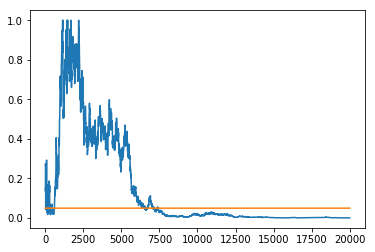

/Users/marktblack/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


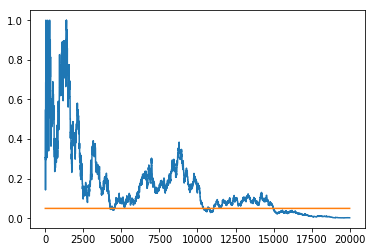

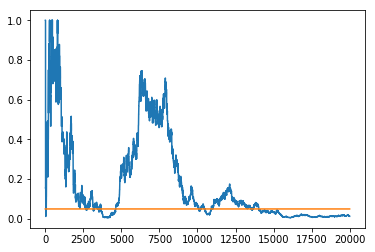

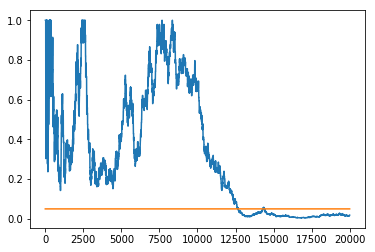

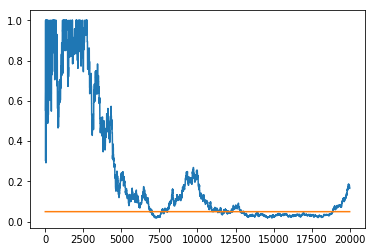

In [6]:
class DataGenerator:
  def __init__(self, p1, p2):
    self.p1 = p1
    self.p2 = p2

  def next(self):
    click1 = 1 if (np.random.random() < self.p1) else 0
    click2 = 1 if (np.random.random() < self.p2) else 0
    return click1, click2


def get_p_value(T):
  # same as scipy.stats.chi2_contingency(T, correction=False)
  det = T[0,0]*T[1,1] - T[0,1]*T[1,0]
  c2 = float(det) / T[0].sum() * det / T[1].sum() * T.sum() / T[:,0].sum() / T[:,1].sum()
  p = 1 - chi2.cdf(x=c2, df=1)
  return p


def run_experiment(p1, p2, N):
  data = DataGenerator(p1, p2)
  p_values = np.empty(N)
  T = np.zeros((2, 2)).astype(np.float32)
  for i in range(N):
    c1, c2 = data.next()
    T[0,c1] += 1
    T[1,c2] += 1
    # ignore the first 10 values
    if i < 10:
      p_values[i] = None
    else:
      p_values[i] = get_p_value(T)
  plt.plot(p_values)
  plt.plot(np.ones(N)*0.05)
  plt.show()
  return T

for idx in range(5):
    run_experiment(0.1, 0.11, 20000)

As you can see above the p-value is tricky as there is no apparent robust consistency to running a simulation and the p-value remaining statistically significant

In [7]:
_, A_clicks = np.unique(A_arr, return_counts=True)
_, B_clicks = np.unique(B_arr, return_counts=True)

In [8]:
A_clicks[0]

1292

#### $\chi^2$ Exercise

In [9]:
T_mat = np.zeros((2,2)).astype(np.float32)
T_mat[0][0] = A_clicks[1] /(A_clicks[0] + A_clicks[1])
T_mat[0][1] = A_clicks[0] /(A_clicks[0] + A_clicks[1])
T_mat[1][0] = B_clicks[1] /(B_clicks[0] + B_clicks[1])
T_mat[1][1] = B_clicks[0] /(B_clicks[0] + B_clicks[1])

In [10]:
get_p_value(T_mat)

0.9574881680439157

---

## Bayesian Methods

Recall

$$P(\theta|X)=\frac{P(X|\theta)P(\theta)}{P(X)}=\frac{P(X|\theta)P(\theta)}{Z}$$

where 

- $Z$ is a normalizing constant 
- $P(X|\theta)$ = **likelihood** (how likely is this data given current $\theta$?) 
- $P(\theta)$ = **prior** (old beliefs about $\theta$)
- $P(\theta|X)$ = **posterior** (new belief about $\theta$ after seeing data)

#### Explore v Exploit

Should you "explore" more with more random data or "exploit"?



### Algorithms

#### Epsilon-Greedy Algorithm

- Adaptive system based on performance of A/B

- loss proportional to $N$

- Approach that uses $\epsilon$ as a variable that determins "exploit" or "explore"

- $\epsilon$ = probability of exploration

- Psuedocode:

$\epsilon=0.1$<br>
while True:<br>
r=rand()<br>
if r<$\epsilon:$<br>
explore<br>
else:<br>
exploit<br>


#### UCB1

- loss proportional to $ln(N)$

$$\epsilon_{j}=\sqrt{\frac{2ln(N)}{N_{j}}}$$

- Psuedocode is:

$N=0$ <br>
$N_{j}=0$ for all bandits $j$<br>
while True:<br>
$j^*=argmax(\hat{\mu_{j}}+\sqrt{\frac{2ln(N)}{n_{j}}}$<br>
play arm $j^*$<br>
update $\hat{\mu_{j}}$<br>
$N++$; $N_{j}^* ++$

### Congugate Priors

Congugate priors give us elegant solutions for $P(\theta|X)$ by choosing specific distributions for $P(X|\theta)$ and $P(\theta)$ then we can make $P(\theta|X)$ have the same type of distribution as $P(\theta)$

For example, if we know that a CTR is Bernoulli:

$$P(X|\theta)=\prod_{i=1}^N\theta^{x_{i}}(1-\theta)^{1-x_{i}}$$

Or since we know that $\theta$ is a probability (between 0 and 1) we can use the Beta distribution:

$$\theta\sim Beta(a,b)=\frac{\theta^{a-1}(1-\theta)^{b-1}}{B(a,b)}$$

where $B(a,b)=\frac{\Gamma(a)\Gamma(b)}{\Gamma(a+b)}$ and $\Gamma(n)=(n-1)!$ generalized form of the Gamma function

Therefore in terms of CRT

$$P(\theta|X)=Beta(a',b')$$

where $a'=a+\sum_{i=1}^N x_{i}, b'=b+N-\sum_{i=1}^N x_{i}$

where $a'=a+\text{# of clicks}, b'=b+\text{# of no clicks}$

where 

$$E(\theta)=\frac{a}{a+b}$$ 

and 

$$var(\theta)={ab}{(a+b)^2(a+b+1)}$$ 

where the variance gets smaller as more data samples are collected

*non-informative prior = setting a and b both to 1 (equal)

In [17]:
# Bayesian A/B Testing Algorithm
from scipy.stats import beta

class Bandit(object):
  def __init__(self, p):
    self.p = p
    self.a = 1
    self.b = 1

  def pull(self):
    return np.random.random() < self.p

  def sample(self):
    return np.random.beta(self.a, self.b)

  def update(self, x):
    self.a += x
    self.b += 1 - x


def plot(bandits, trial):
  x = np.linspace(0, 1, 200)
  for b in bandits:
    y = beta.pdf(x, b.a, b.b)
    plt.plot(x, y, label="real p: %.4f" % b.p)
  plt.title("Bandit distributions after %s trials" % trial)
  plt.legend()
  plt.show()

current samples: ['0.5551', '0.8006', '0.0297']


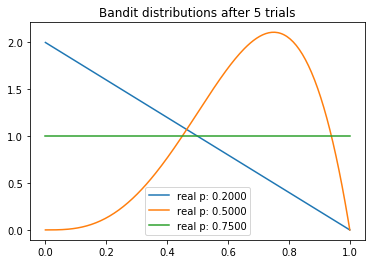

current samples: ['0.8935', '0.7344', '0.5644']


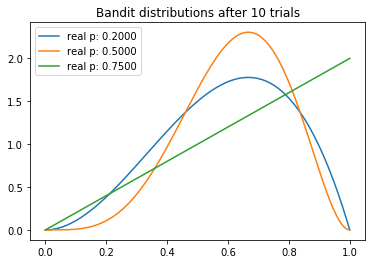

current samples: ['0.5270', '0.5084', '0.4696']


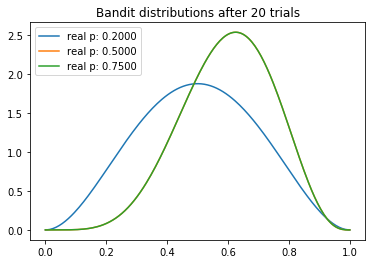

current samples: ['0.2433', '0.3818', '0.8043']


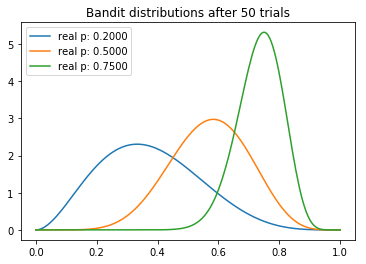

current samples: ['0.4844', '0.2665', '0.7763']


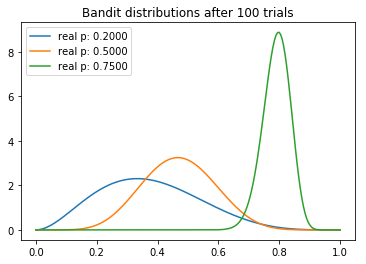

current samples: ['0.2832', '0.3258', '0.6981']


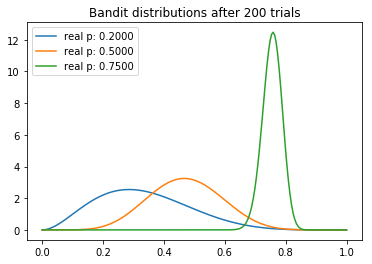

current samples: ['0.3258', '0.5246', '0.7720']


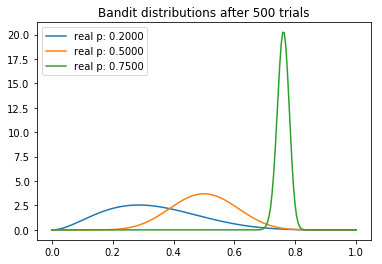

current samples: ['0.2242', '0.5477', '0.7738']


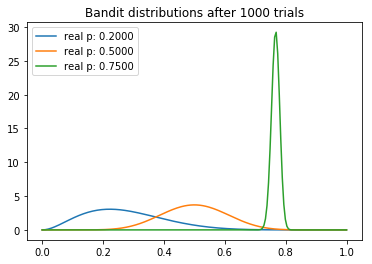

current samples: ['0.3098', '0.7541', '0.7474']


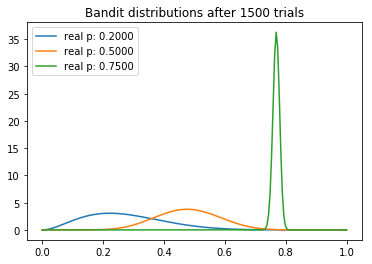

current samples: ['0.3421', '0.4921', '0.7493']


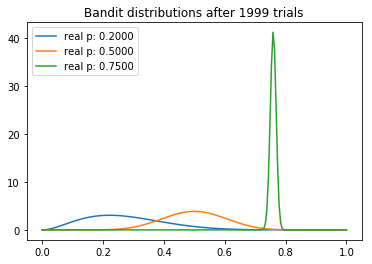

In [19]:
NUM_TRIALS = 2000
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

def experiment():
  bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]

  sample_points = [5,10,20,50,100,200,500,1000,1500,1999]
  for i in range(NUM_TRIALS):

    # take a sample from each bandit
    bestb = None
    maxsample = -1
    allsamples = [] # let's collect these just to print for debugging
    for b in bandits:
      sample = b.sample()
      allsamples.append("%.4f" % sample)
      if sample > maxsample:
        maxsample = sample
        bestb = b
    if i in sample_points:
      print("current samples: %s" % allsamples)
      plot(bandits, i)

    # pull the arm for the bandit with the largest sample
    x = bestb.pull()

    # update the distribution for the bandit whose arm we just pulled
    bestb.update(x)


if __name__ == "__main__":
  experiment()

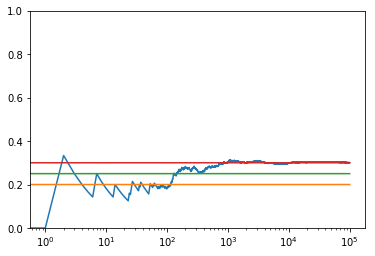

In [20]:
def run_experiment(p1, p2, p3, N):
  bandits = [Bandit(p1), Bandit(p2), Bandit(p3)]

  data = np.empty(N)
  
  for i in range(N):
    # thompson sampling
    j = np.argmax([b.sample() for b in bandits])
    x = bandits[j].pull()
    bandits[j].update(x)

    # for the plot
    data[i] = x
  cumulative_average_ctr = np.cumsum(data) / (np.arange(N) + 1)

  # plot moving average ctr
  plt.plot(cumulative_average_ctr)
  plt.plot(np.ones(N)*p1)
  plt.plot(np.ones(N)*p2)
  plt.plot(np.ones(N)*p3)
  plt.ylim((0,1))
  plt.xscale('log')
  plt.show()


run_experiment(0.2, 0.25, 0.3, 100000)

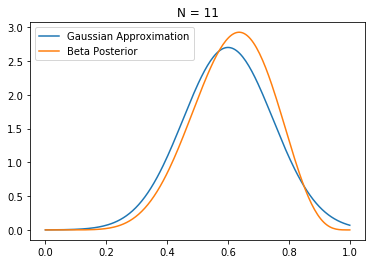

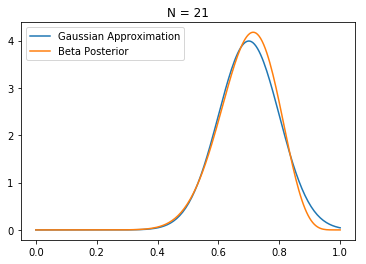

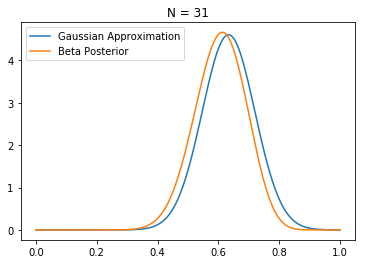

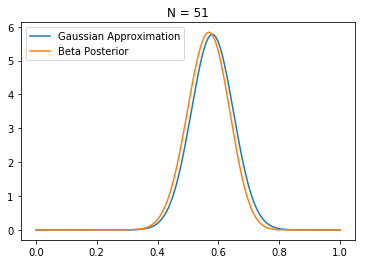

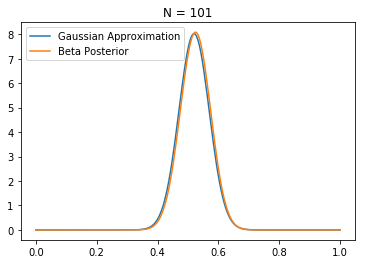

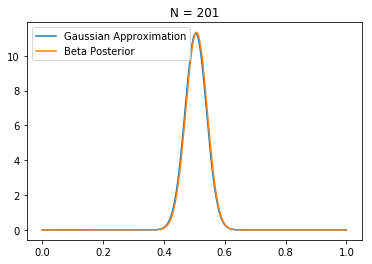

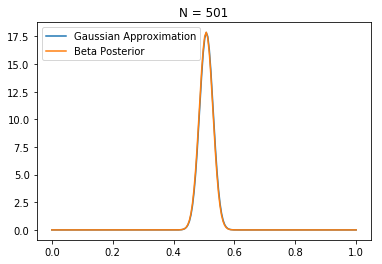

In [21]:
from scipy.stats import beta, norm

T = 501 # number of coin tosses
true_ctr = 0.5
a, b = 1, 1 # beta priors
plot_indices = (10, 20, 30, 50, 100, 200, 500)
data = np.empty(T)
for i in range(T):
  x = 1 if np.random.random() < true_ctr else 0
  data[i] = x

  # update a and b
  a += x
  b += 1 - x

  if i in plot_indices:
    # maximum likelihood estimate of ctr
    p = data[:i].mean()
    n = i + 1 # number of samples collected so far
    std = np.sqrt(p*(1-p)/n)
    
    # gaussian
    x = np.linspace(0, 1, 200)
    g = norm.pdf(x, loc=p, scale=std)
    plt.plot(x, g, label='Gaussian Approximation')

    # beta
    posterior = beta.pdf(x, a=a, b=b)
    plt.plot(x, posterior, label='Beta Posterior')
    plt.legend()
    plt.title("N = %s" % n)
    plt.show()

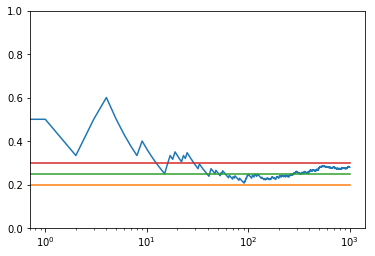

In [34]:
def run_experiment(p1, p2, p3, N):
    bandits = [Bandit(p1), Bandit(p2), Bandit(p3)]

    data = np.empty(N)

    for i in range(N):
    # thompson sampling
        j = np.argmax([b.sample() for b in bandits])
#         print(j)
        x = bandits[j].pull()
        bandits[j].update(x)

    # for the plot
        data[i] = x
    cumulative_average_ctr = np.cumsum(data) / (np.arange(N) + 1)
#     print(cumulative_average_ctr)

    # plot moving average ctr
    plt.plot(cumulative_average_ctr)
    plt.plot(np.ones(N)*p1)
    plt.plot(np.ones(N)*p2)
    plt.plot(np.ones(N)*p3)
    plt.ylim((0,1))
    plt.xscale('log')
    plt.show()


run_experiment(0.2, 0.25, 0.3, 1000)

#### Confidence Interval Comparison

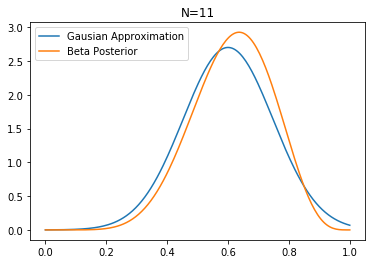

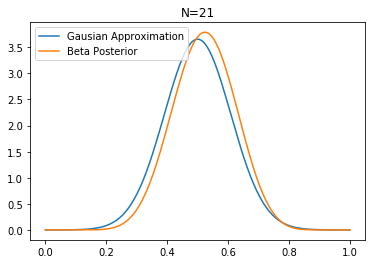

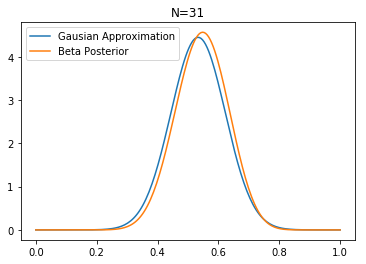

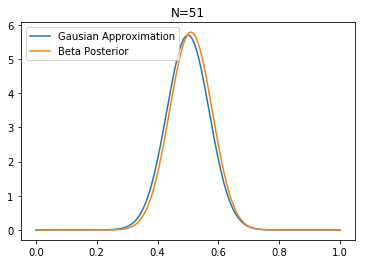

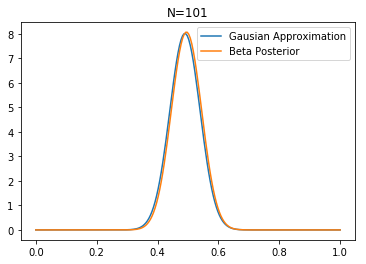

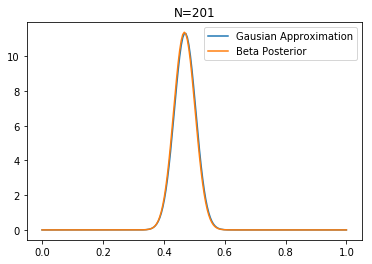

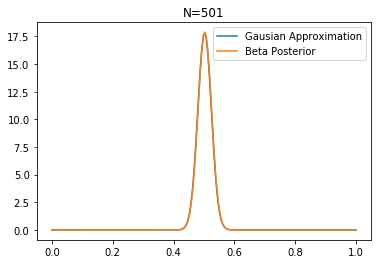

In [48]:
T = 501
true_ctr = 0.5
a, b = 1, 1
plot_indices = (10,20,30,50,100,200,500)
data = np.empty(T)

for i in range(T):
    x = 1 if np.random.random() < true_ctr else 0
    data[i] = x
    
    a += x
    b += 1-x
    
    if i in plot_indices:
        p = data[:i].mean()
        n = i + 1
        std = np.sqrt(p*(1-p)/n)
        
        x = np.linspace(0, 1, 200)
        g = norm.pdf(x, loc=p, scale=std)
        plt.plot(x, g, label='Gausian Approximation')
        
        # beta
        posterior = beta.pdf(x, a=a, b=b)
        plt.plot(x, posterior, label='Beta Posterior')
        plt.legend()
        plt.title("N=%s" % n)
        plt.show()

## Simulation

#### Die Roll

Categorical Likelihood function:

$$P(X|\theta)=\prod_{n=1}^N\prod_{k=1}^K \theta_{k}^{I(x_{n}==k)}$$

where $I$ is the identity function which returns 1 if True or 0 if False

**Dirichlet Prior (multivariate version of the Beta) PDF**:

$$Dirichlet(\vec{\alpha})=\frac{1}{B(\vec{\alpha})}\prod_{k=1}^K\theta_{k}^{\alpha_{k}-1}$$

where

$$B(\vec{\alpha})=\frac{\prod_{k=1}^K\Gamma(\alpha_{k})}{\Gamma(\sum_{k=1}^K\alpha_{k})}$$

$$\vec{\alpha}=(\alpha+{1},...,\alpha_{K})$$

**Posterior** (multiply the Categorical Likelihood Funcion and Dirchlet Prior):

$$P(X|\theta)=\prod_{n=1}^N\prod_{k=1}^K \theta_{k}^{I(x_{n}==k)}\frac{1}{B(\vec{\alpha})}\prod_{k=1}^K\theta_{k}^{\alpha_{k}-1}$$

$$P(\theta|X)\propto\prod_{k=1}^K\theta_{k}^{\alpha_{k}-1+\sum_{n=1}^N I(x_{n}==k)}$$

where

$$P(\theta|X)=Dirichlet(\vec{\alpha}')$$
$$\alpha_{k}'=\alpha_{k}+\sum_{n=1}^N I(x_{n}==k)$$
$$\alpha_{k}'=\alpha_{k}+\text{# of times k appeared}$$

basically a multidimensional coin toss

In [49]:
A_B_df.head()

,advertisement_id,action
0,B,1
1,B,1
2,B,1
3,A,0
4,A,0


In [ ]:
class die:
    
    def __init__(self):
        pass
    
    def die_roll(self):
        